<a href="https://colab.research.google.com/github/Khemapsorn/data_viz_2022/blob/main/%E0%B8%9E%E0%B8%9A%E0%B8%AD%E0%B8%B2%E0%B8%88%E0%B8%B2%E0%B8%A3%E0%B8%A2%E0%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libralies
import pandas as pd # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # พล็อตกราฟต่างๆ 

from scipy.integrate import odeint #Integrate a system of ordinary differential equations.
                                                # func(y, t0, ...) 

%config InlineBackend.figure_format = 'retina'

# SIR model

In [2]:
# SIR model
# Differential equation สมการเชิงอนุพันธ์
def deriv(y, t, N, beta, gamma): # ตัวแปร
    S, I, R = y
    dSdt =(-beta*S*I) / N
    dIdt = ((beta*S*I) / N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

# กำหนดค่าต่าง ๆ (เตรียมข้อมูลแบบจำลอง)

In [17]:
# Number of population
N = 1000

# Time period (100 days)
t = np.arange(0,100,1)

# Initial number of infected and recoverd
I0 = 1
R0 = 0

#Initial susceptible to infection (Start with 1)
S0 = N - I0 - R0

# Set Beta and Gamma
beta = 1/7  
gamma = 1/14
# โดยเฉลี่ย 7 วัน จะมีผู้ป่วยใหม่ 1 คน
# โดยเฉลี่ย 14 วัน จะมีผู้หำยป่วยจำกโรค 1 คน 
# Constant rate beta and gamma rates
#b = 1 / beta
#g = 1 / gamma

#Integration SIR model
simulationresult = odeint(deriv, (S0, I0, R0), t, args = (N,beta,gamma))

#Summary
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Infectious','Recovery'])
simulationResult = simulationResult.astype(np.int32)

In [18]:
t = np.arange(0,100,1)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [19]:
S0 = N - I0 - R0 # 1000-1-0
S0

999

In [20]:
simulationresult = odeint(deriv, (S0, I0, R0), t, args = (N,beta,gamma)) # คำสั่งใช้หา Differential equation
simulationresult

array([[9.99000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.98852087e+02, 1.07387679e+00, 7.40358126e-02],
       [9.98693274e+02, 1.15318611e+00, 1.53540287e-01],
       [9.98522761e+02, 1.23832357e+00, 2.38915429e-01],
       [9.98339695e+02, 1.32971299e+00, 3.30592494e-01],
       [9.98143158e+02, 1.42780833e+00, 4.29034067e-01],
       [9.97932168e+02, 1.53309574e+00, 5.34736322e-01],
       [9.97705673e+02, 1.64609568e+00, 6.48231350e-01],
       [9.97462545e+02, 1.76736525e+00, 7.70089716e-01],
       [9.97201576e+02, 1.89750060e+00, 9.00923177e-01],
       [9.96921473e+02, 2.03713941e+00, 1.04138750e+00],
       [9.96620851e+02, 2.18696367e+00, 1.19218557e+00],
       [9.96298227e+02, 2.34770250e+00, 1.35407070e+00],
       [9.95952015e+02, 2.52013506e+00, 1.52785001e+00],
       [9.95580518e+02, 2.70509373e+00, 1.71438818e+00],
       [9.95181921e+02, 2.90346729e+00, 1.91461133e+00],
       [9.94754284e+02, 3.11620441e+00, 2.12951117e+00],
       [9.94295533e+02, 3.34431

In [21]:
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Infectious','Recovery'])
simulationResult

,Susceptible,Infectious,Recovery
0,999.000000,1.000000,0.000000
1,998.852087,1.073877,0.074036
2,998.693274,1.153186,0.153540
3,998.522761,1.238324,0.238915
4,998.339695,1.329713,0.330592
...,...,...,...
95,495.646418,153.907597,350.445985
96,484.873733,153.693134,361.433133
97,474.357652,153.245747,372.396601
98,464.106819,152.573161,383.320020


In [22]:
simulationResult = simulationResult.astype(np.int32) # ปรับตัวเลขเป็นจำนวนเต็มของตารางข้างบน
simulationResult

,Susceptible,Infectious,Recovery
0,999,1,0
1,998,1,0
2,998,1,0
3,998,1,0
4,998,1,0
...,...,...,...
95,495,153,350
96,484,153,361
97,474,153,372
98,464,152,383


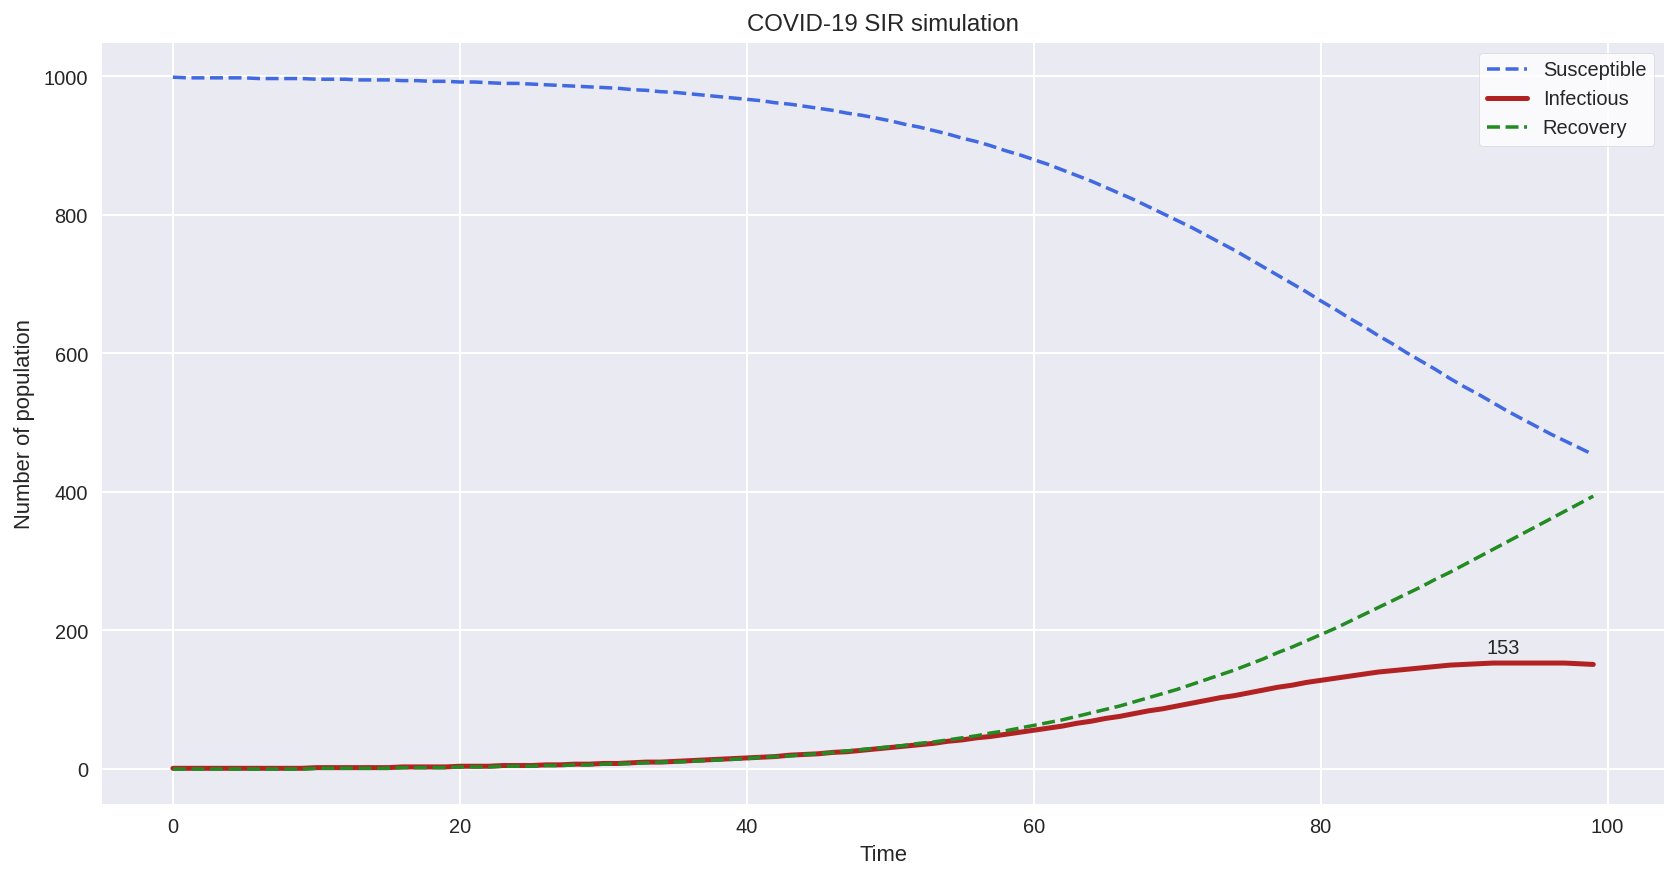

In [24]:
# plot the simulation
plt.figure (figsize = (14, 7)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('COVID-19 SIR simulation') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--',label = 'Susceptible') # S
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') #I
    plt.plot(simulationResult['Recovery'], c = 'forestgreen', linestyle = '--' ,label = 'Recovery') # R
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()